In [1]:
!pip install dmba==0.0.18
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#Plotly Graphing Libraries
from plotly.offline import init_notebook_mode, iplot
import cufflinks
cufflinks.go_offline()
cufflinks.set_config_file(world_readable=True, theme='pearl')
import plotly.graph_objs as go
import plotly
import plotly.express as px

## Machine Learning Libaries
from sklearn import svm,metrics,tree,preprocessing,linear_model
from sklearn.preprocessing import MinMaxScaler,StandardScaler
import tensorflow as tf
import keras
from sklearn.model_selection import train_test_split,cross_val_score, cross_val_predict
from sklearn import svm,metrics,tree,preprocessing,linear_model
from sklearn.preprocessing import MinMaxScaler,StandardScaler
import statsmodels.api as sm
from sklearn.metrics import accuracy_score,mean_squared_error,recall_score,confusion_matrix,f1_score,roc_curve, auc
from keras import Sequential
from keras.layers import Dense, Activation
from keras.callbacks import CSVLogger
from sklearn.neural_network import MLPClassifier
from dmba import classificationSummary

# from tensorflow_core.estimator import inputs

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 6.1 MB/s eta 0:00:00


no display found. Using non-interactive Agg backend


This line uses !pip install to install a Python package called dmba.
dmba likely stands for "Data Mining and Business Analytics" and provides tools for these tasks.
==0.0.18 specifies that we want to install version 0.0.18 of the dmba package

```
# This is formatted as code
```


numpy (as np): Provides tools for numerical computations, particularly with arrays and matrices.
pandas (as pd): Enables working with data structures like DataFrames for data manipulation and analysis.
seaborn (as sns): Builds on matplotlib to create more visually appealing and informative statistical graphics.
matplotlib.pyplot (as plt): A fundamental library for creating visualizations in Python, like plots and charts.
%matplotlib inline: A magic command in Jupyter Notebooks to display plots directly within the notebook.

These lines import components from the plotly library and cufflinks, which are used for creating interactive and visually appealing plots.
cufflinks integrates plotly with pandas, making it easier to generate plots directly from DataFrames.
plotly.express provides a high-level interface for creating complex charts quickly.

This section imports a wide array of tools for machine learning tasks:
sklearn (scikit-learn): A comprehensive library for various machine learning algorithms, model evaluation, and data preprocessing.
tensorflow and keras: Popular libraries for deep learning, building and training neural networks.
statsmodels: Provides tools for statistical modeling.
Specific functions and classes are imported for tasks like:
Data scaling (MinMaxScaler, StandardScaler)
Model selection (train_test_split, cross_val_score)
Model evaluation (accuracy_score, confusion_matrix, etc.)
Building neural networks (Sequential, Dense, Activation).

In [4]:
df = pd.read_csv('/DataCoSupplyChainDataset.csv', header=0, encoding='latin1')

Data Description


In [5]:
df.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360.0,73.0,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0.0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360.0,73.0,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0.0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,NaN,1360.0,73.0,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0.0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,NaN,1360.0,73.0,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0.0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360.0,73.0,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0.0,1/15/2018 11:24,Standard Class


display's first 5 row of tyhe dataset

In [6]:
df.shape


(49642, 53)

display dimensions (no of row,no of columns)



```
# This is formatted as code
```
In essence, df.info() gives you a quick overview of the data's structure, types, and potential missing values.



In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49642 entries, 0 to 49641
Data columns (total 53 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Type                           49642 non-null  object 
 1   Days for shipping (real)       49642 non-null  int64  
 2   Days for shipment (scheduled)  49642 non-null  int64  
 3   Benefit per order              49642 non-null  float64
 4   Sales per customer             49642 non-null  float64
 5   Delivery Status                49642 non-null  object 
 6   Late_delivery_risk             49642 non-null  int64  
 7   Category Id                    49642 non-null  int64  
 8   Category Name                  49642 non-null  object 
 9   Customer City                  49642 non-null  object 
 10  Customer Country               49642 non-null  object 
 11  Customer Email                 49642 non-null  object 
 12  Customer Fname                 49642 non-null 

In [8]:
df.isnull().sum()


,0
Type,0
Days for shipping (real),0
Days for shipment (scheduled),0
Benefit per order,0
Sales per customer,0
Delivery Status,0
Late_delivery_risk,0
Category Id,0
Category Name,0
Customer City,0


In simpler terms: df.isnull().sum() helps you identify which columns in your dataset have missing data and how many missing values are in each of those columns. This is a crucial step in data cleaning and preprocessing because missing values can often affect the performance of machine learning models.



In [9]:
df['Cust_Full_Name'] = df['Customer Fname'].astype(str) + df['Customer Lname'].astype(str)


This line of code is combining the first names (Customer Fname) and last names (Customer Lname) from existing columns to create a new column called Cust_Full_Name that contains the customer's full name. It makes sure both first and last names are treated as text before joining them.

**Data Cleaning**

In [10]:
# Get the actual column names of the DataFrame
actual_columns = df.columns.tolist()

# Print the actual column names for inspection
print(actual_columns)

# Update the drop method with the correct column names
# Make sure the column names in the list below match the printed output exactly
columns_to_drop = ['Customer Email','Product Status','Customer Password', 'Customer Street',  # Removed 'Product Status'
                   'Customer Fname', 'Customer Lname', 'Latitude', 'Longitude',
                   'Product Description', 'Product Image', 'Order Zipcode',
                    'shipping date (DateOrders)']

# Remove duplicate column names (e.g., 'Customer Email' was listed twice)
columns_to_drop = list(set(columns_to_drop))  # Convert to set and back to list to remove duplicates

# Attempt to drop the columns
try:
    df.drop(columns=columns_to_drop, axis=1, inplace=True)
except KeyError as e:
    print(f"Error: {e}")
    print("The following columns were not found:")
    missing_cols = [col for col in columns_to_drop if col not in actual_columns]
    print(missing_cols)

['Type', 'Days for shipping (real)', 'Days for shipment (scheduled)', 'Benefit per order', 'Sales per customer', 'Delivery Status', 'Late_delivery_risk', 'Category Id', 'Category Name', 'Customer City', 'Customer Country', 'Customer Email', 'Customer Fname', 'Customer Id', 'Customer Lname', 'Customer Password', 'Customer Segment', 'Customer State', 'Customer Street', 'Customer Zipcode', 'Department Id', 'Department Name', 'Latitude', 'Longitude', 'Market', 'Order City', 'Order Country', 'Order Customer Id', 'order date (DateOrders)', 'Order Id', 'Order Item Cardprod Id', 'Order Item Discount', 'Order Item Discount Rate', 'Order Item Id', 'Order Item Product Price', 'Order Item Profit Ratio', 'Order Item Quantity', 'Sales', 'Order Item Total', 'Order Profit Per Order', 'Order Region', 'Order State', 'Order Status', 'Order Zipcode', 'Product Card Id', 'Product Category Id', 'Product Description', 'Product Image', 'Product Name', 'Product Price', 'Product Status', 'shipping date (DateOrde

In [11]:
df.shape

(49642, 42)

In [12]:
df.isnull().sum()

,0
Type,0
Days for shipping (real),0
Days for shipment (scheduled),0
Benefit per order,0
Sales per customer,0
Delivery Status,0
Late_delivery_risk,0
Category Id,0
Category Name,0
Customer City,0


In [13]:
df['Customer Zipcode']=df['Customer Zipcode'].fillna(0)

In [14]:
df['order date (DateOrders)'].head()


,order date (DateOrders)
0,1/31/2018 22:56
1,1/13/2018 12:27
2,1/13/2018 12:06
3,1/13/2018 11:45
4,1/13/2018 11:24


In [15]:
## Splitting Order dates and creating new columns
df['order_yr']= pd.DatetimeIndex(df['order date (DateOrders)']).year
df['order_month'] = pd.DatetimeIndex(df['order date (DateOrders)']).month
df['order_day'] = pd.DatetimeIndex(df['order date (DateOrders)']).weekday
df['order_hour'] = pd.DatetimeIndex(df['order date (DateOrders)']).hour


Data Visualization

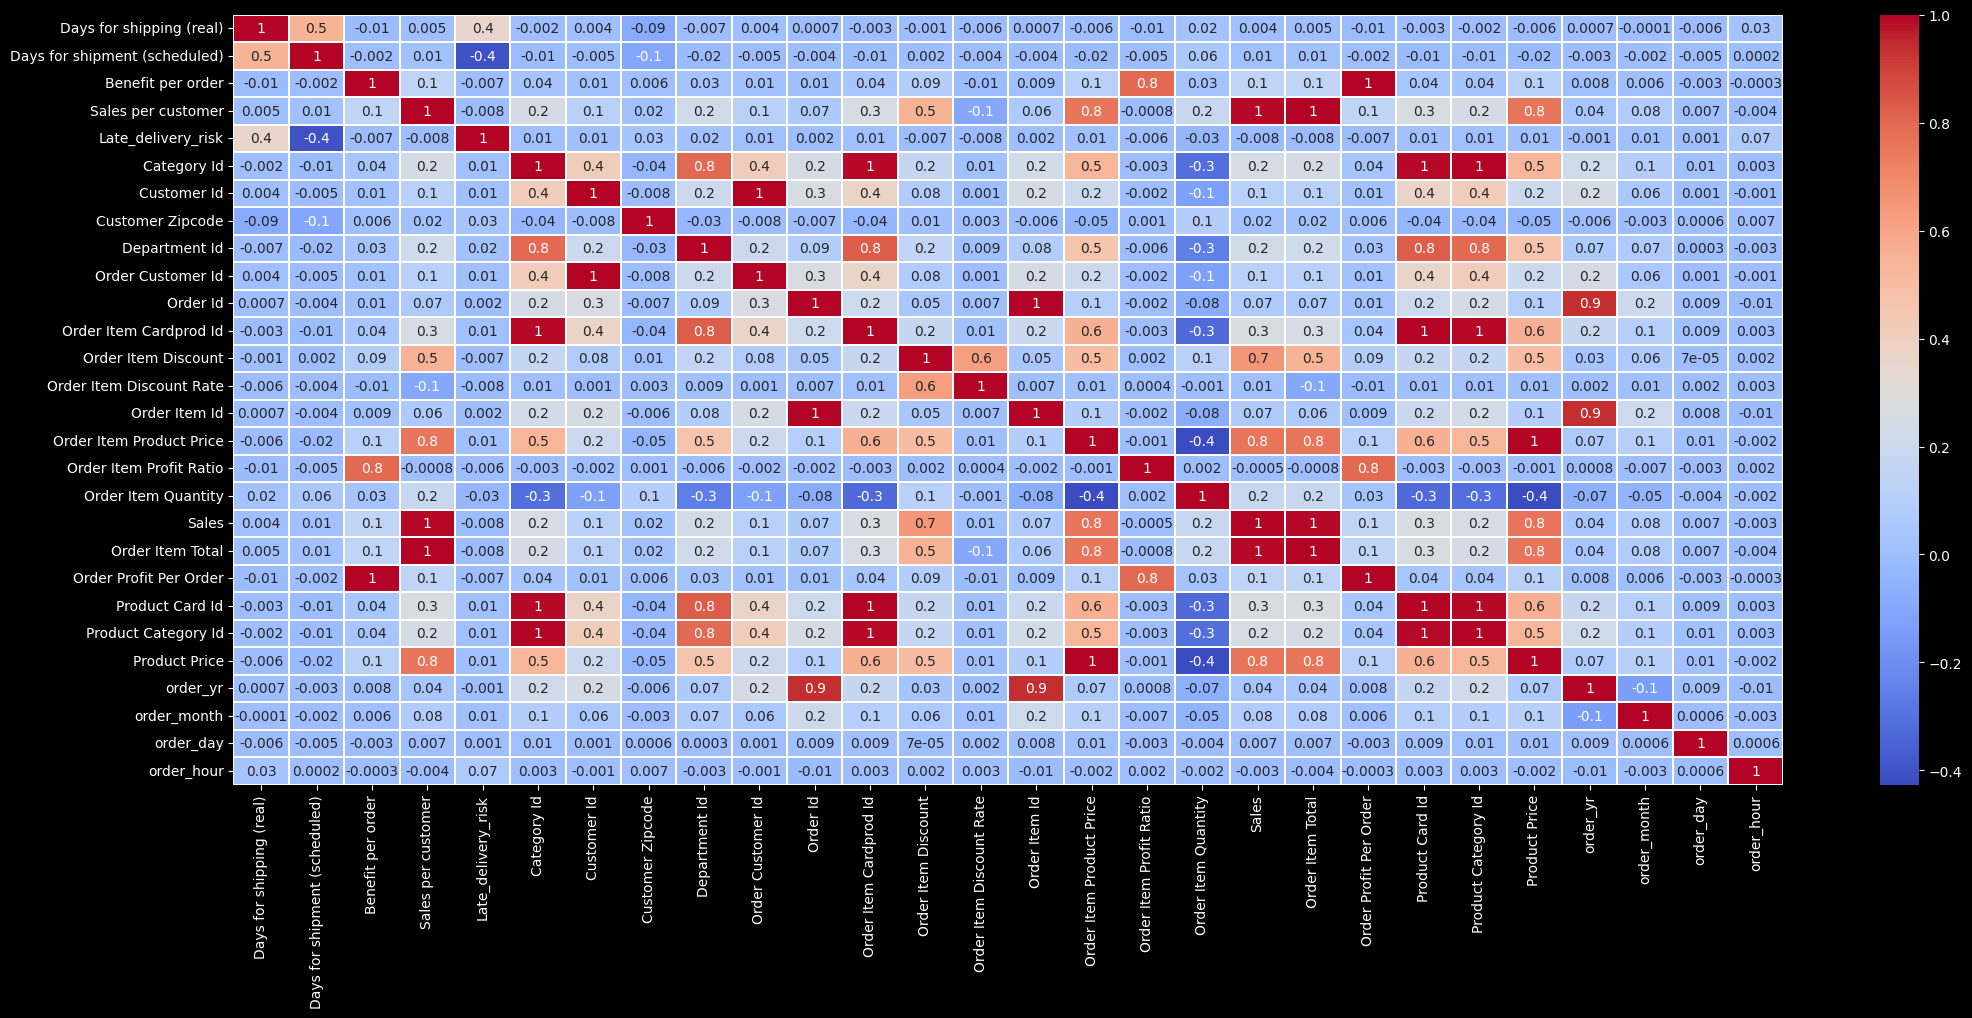

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Set the Matplotlib backend to 'inline'
%matplotlib inline

# Select only numerical features for correlation calculation
numerical_df = df.select_dtypes(include=['number'])

# Now calculate correlation and plot heatmap
plt.style.use("dark_background")
fig, ax = plt.subplots(figsize=(25,10))         # figsize
sns.heatmap(numerical_df.corr(),annot=True, linewidths=.3 ,fmt='.1g', cmap= 'coolwarm')

# Display the plot
plt.show()

In [17]:
loss = df[(df['Benefit per order']<0)]


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Europe'),
  Text(1, 0, 'LATAM'),
  Text(2, 0, 'Pacific Asia'),
  Text(3, 0, 'USCA'),
  Text(4, 0, 'Africa')])

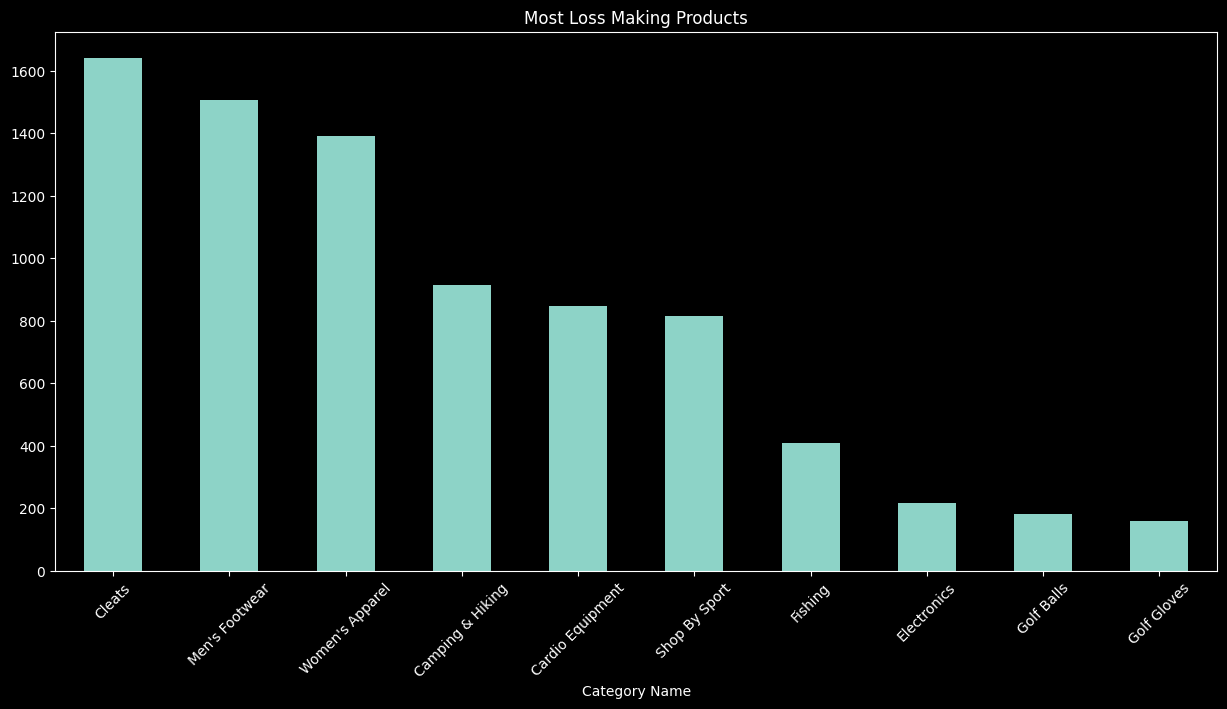

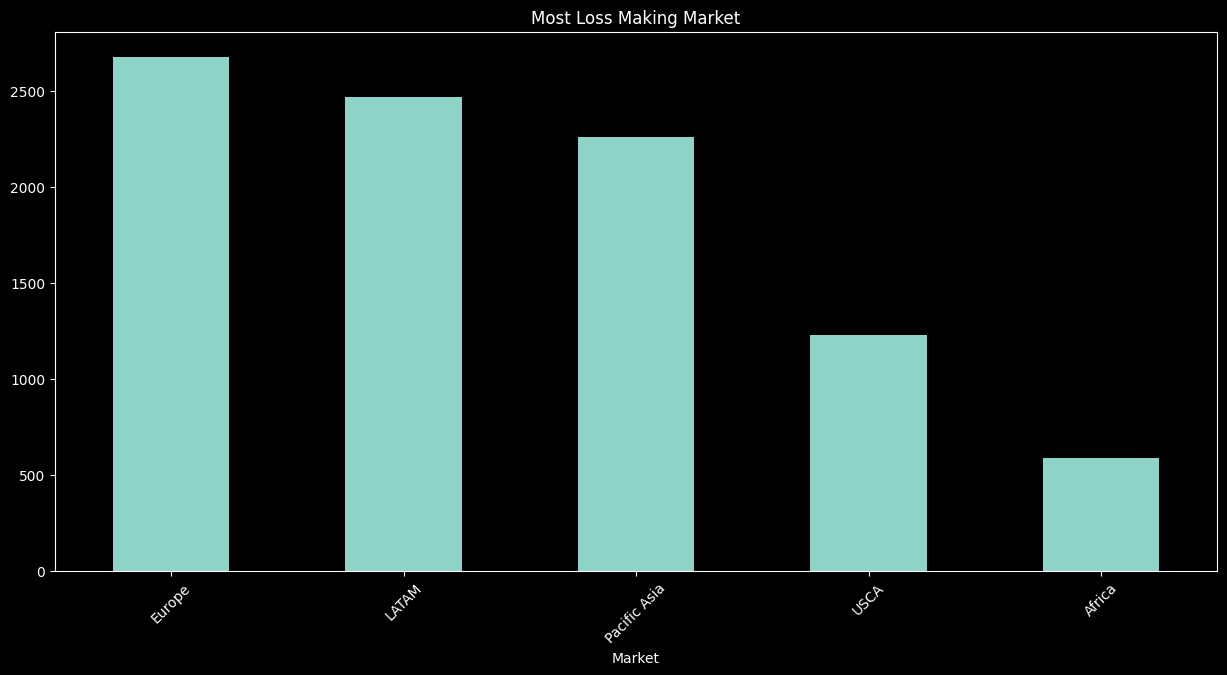

In [18]:
plt.figure(1)
loss['Category Name'].value_counts().nlargest(10).plot.bar(figsize=(15,7), title="Most Loss Making Products")
plt.xticks(rotation = 45)
plt.figure(2)
loss['Market'].value_counts().nlargest(10).plot.bar(figsize=(15,7), title="Most Loss Making Market")
plt.xticks(rotation = 45)


In [19]:
status = df.groupby('Type')['Order Status'].value_counts()
status_df = status.to_frame()


In [20]:
status_df


count
Type     Order Status          
CASH     CLOSED            9138
DEBIT    COMPLETE         19020
         ON_HOLD           3083
PAYMENT  PENDING_PAYMENT  11173
         PAYMENT_REVIEW     553
TRANSFER PROCESSING        3041
         PENDING           2592
         SUSPECTED_FRAUD    550
         CANCELED           491

In [21]:
fraud_region = df[(df['Order Status'] == 'SUSPECTED_FRAUD')]


In [22]:
plt.style.use("dark_background")
temp = fraud_region['Category Name'].value_counts().nlargest(10)
temp.iplot(kind='bar', xTitle = 'Category', yTitle = "Count", title = 'Count of Products with suspected fraud', color = '#FF0000')


In [23]:
# Creating a copy of the datafram
train_df = df.copy()


In [24]:
# Creating Binary enocode for Suspected Fraud and Late delivery

train_df['fraud'] = np.where(train_df['Order Status'] == 'SUSPECTED_FRAUD', 1, 0)
train_df['late_delivery']=np.where(train_df['Delivery Status'] == 'Late delivery', 1, 0)


In [25]:
train_df.columns


Index(['Type', 'Days for shipping (real)', 'Days for shipment (scheduled)',
       'Benefit per order', 'Sales per customer', 'Delivery Status',
       'Late_delivery_risk', 'Category Id', 'Category Name', 'Customer City',
       'Customer Country', 'Customer Id', 'Customer Segment', 'Customer State',
       'Customer Zipcode', 'Department Id', 'Department Name', 'Market',
       'Order City', 'Order Country', 'Order Customer Id',
       'order date (DateOrders)', 'Order Id', 'Order Item Cardprod Id',
       'Order Item Discount', 'Order Item Discount Rate', 'Order Item Id',
       'Order Item Product Price', 'Order Item Profit Ratio',
       'Order Item Quantity', 'Sales', 'Order Item Total',
       'Order Profit Per Order', 'Order Region', 'Order State', 'Order Status',
       'Product Card Id', 'Product Category Id', 'Product Name',
       'Product Price', 'Shipping Mode', 'Cust_Full_Name', 'order_yr',
       'order_month', 'order_day', 'order_hour', 'fraud', 'late_delivery'],
     

In [26]:
## Removing Identical columns after creating new columns

train_df.drop(['Delivery Status','Late_delivery_risk','Order Status','order date (DateOrders)'], axis=1, inplace=True)


In [27]:
## Final dimensions of the dataset after wrangling and cleaning

train_df.shape


(49642, 44)

In [28]:
train_df.dtypes


,0
Type,object
Days for shipping (real),int64
Days for shipment (scheduled),int64
Benefit per order,float64
Sales per customer,float64
Category Id,int64
Category Name,object
Customer City,object
Customer Country,object
Customer Id,int64


In [29]:
le = preprocessing.LabelEncoder()
#convert the categorical columns into numeric
train_df['Customer Country']  = le.fit_transform(train_df['Customer Country'])
train_df['Market']            = le.fit_transform(train_df['Market'])
train_df['Type']              = le.fit_transform(train_df['Type'])
train_df['Product Name']      = le.fit_transform(train_df['Product Name'])
train_df['Customer Segment']  = le.fit_transform(train_df['Customer Segment'])
train_df['Customer State']    = le.fit_transform(train_df['Customer State'])
train_df['Order Region']      = le.fit_transform(train_df['Order Region'])
train_df['Order City']        = le.fit_transform(train_df['Order City'])
train_df['Category Name']     = le.fit_transform(train_df['Category Name'])
train_df['Customer City']     = le.fit_transform(train_df['Customer City'])
train_df['Department Name']   = le.fit_transform(train_df['Department Name'])
train_df['Order State']       = le.fit_transform(train_df['Order State'])
train_df['Shipping Mode']     = le.fit_transform(train_df['Shipping Mode'])
train_df['Order Country']     = le.fit_transform(train_df['Order Country'])


In [30]:
train_df.head()


,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Category Id,Category Name,Customer City,Customer Country,Customer Id,...,Product Name,Product Price,Shipping Mode,Cust_Full_Name,order_yr,order_month,order_day,order_hour,fraud,late_delivery
0,1,3,4,91.250000,314.640015,73,35,66,1,20755,...,63,327.75,3,CallyHolloway,2018,1,2,22,0,0
1,3,5,4,-249.089996,311.359985,73,35,66,1,19492,...,63,327.75,3,IreneLuna,2018,1,5,12,0,1
2,0,4,4,-247.779999,309.720001,73,35,452,0,19491,...,63,327.75,3,GillianMaldonado,2018,1,5,12,0,0
3,1,3,4,22.860001,304.809998,73,35,285,0,19490,...,63,327.75,3,TanaTate,2018,1,5,11,0,0
4,2,2,4,134.210007,298.250000,73,35,66,1,19489,...,63,327.75,3,OrliHendricks,2018,1,5,11,0,0


In [31]:
# rows = int(train_df.shape[0] * 0.1)

# randomly select the specified number of rows
# random_rows = np.random.choice(train_df.index, rows, replace=False)

# create a new dataframe from the randomly selected rows
# validation_df = df.loc[random_rows]

# Dropping those rows from the original dataset
# train_df.drop(random_rows,inplace = True)
## Selecting 10% of the dataset for validation

fraction_of_rows = train_df.sample(frac=0.1, random_state = 1)
fraction_of_rows


,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Category Id,Category Name,Customer City,Customer Country,Customer Id,...,Product Name,Product Price,Shipping Mode,Cust_Full_Name,order_yr,order_month,order_day,order_hour,fraud,late_delivery
34726,0,4,4,13.200000,150.000000,24,40,5,0,3973,...,48,50.000000,3,SharonParsons,2017,1,6,21,0,0
14133,1,5,4,4.590000,152.970001,17,12,454,0,189,...,56,59.990002,3,AngelaPeterson,2017,3,0,11,0,1
530,2,5,2,136.750000,290.950012,17,12,66,1,6310,...,56,59.990002,2,JerryDeleon,2015,6,5,18,0,1
38568,2,4,4,-205.899994,128.690002,18,30,391,0,6605,...,45,129.990005,3,MaryBranch,2015,6,5,7,0,0
37977,2,2,2,118.959999,351.959992,9,10,486,0,10862,...,50,99.989998,2,MarySmith,2016,8,5,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28973,2,1,0,6.580000,58.189999,17,12,82,0,518,...,56,59.990002,1,ElizabethSmith,2017,3,5,13,0,1
12920,1,2,4,-14.870000,103.989998,18,30,66,1,56,...,45,129.990005,3,MaryKaiser,2017,8,6,1,0,0
35219,0,6,4,66.300003,170.000000,24,40,365,0,9823,...,48,50.000000,3,MaryCamacho,2015,11,0,19,0,1
13931,1,4,4,-20.340000,179.970001,17,12,428,0,4772,...,56,59.990002,3,RobertGonzalez,2015,9,1,14,0,0


In [32]:
## Creating a list of index of the samples to be dropped from the main dataset

index = fraction_of_rows.index.values.tolist()
index


[34726,
 14133,
 530,
 38568,
 37977,
 45615,
 32430,
 6994,
 7870,
 9771,
 41954,
 43649,
 19565,
 45618,
 25550,
 21148,
 27884,
 18753,
 37542,
 33352,
 17247,
 2666,
 25316,
 21808,
 22999,
 31198,
 38889,
 28397,
 41907,
 4434,
 43374,
 23508,
 34070,
 11843,
 20458,
 41837,
 24815,
 28326,
 24049,
 12183,
 10200,
 17676,
 11596,
 7592,
 31081,
 17027,
 1477,
 13600,
 12819,
 46586,
 6475,
 31953,
 12505,
 2675,
 391,
 8119,
 47443,
 11558,
 11994,
 10569,
 15307,
 31924,
 35602,
 487,
 47916,
 7496,
 25134,
 1900,
 13160,
 14356,
 42362,
 46276,
 45481,
 33118,
 31236,
 9018,
 48169,
 22008,
 22905,
 32253,
 22152,
 47385,
 30559,
 22377,
 43273,
 13838,
 8834,
 27996,
 35856,
 28238,
 15388,
 44330,
 10650,
 32821,
 24423,
 6317,
 29505,
 42083,
 1618,
 41805,
 37717,
 1113,
 11185,
 10564,
 27849,
 48107,
 40753,
 11691,
 35233,
 34329,
 6075,
 41009,
 9190,
 17294,
 28577,
 2343,
 31861,
 19746,
 4974,
 47958,
 48417,
 8804,
 21412,
 5233,
 19524,
 19218,
 34509,
 22387,
 2995

In [33]:
train_df.drop(index = index, inplace = True)


In [34]:
train_df.shape


(44678, 44)

In [35]:
fraction_of_rows.reset_index(drop = True, inplace=True)


In [ ]:
fraction_of_rows.shape


(1795, 44)

In [36]:
X = train_df.loc[:,train_df.columns != 'fraud']
y = train_df['fraud']

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=42)


In [38]:
X_valid = fraction_of_rows.loc[:,fraction_of_rows.columns != 'fraud']
y_valid = fraction_of_rows['fraud']


In [39]:
X_train.shape


(31274, 43)

In [40]:
classes = sorted(y_train.unique())


In [41]:
ss = StandardScaler()


In [43]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Assuming X_train, X_test, and X_valid are your DataFrames

# Select only numerical features for scaling
numerical_features = X_train.select_dtypes(include=['number']).columns

X_train_num = X_train[numerical_features]
X_test_num = X_test[numerical_features]
X_valid_num = X_valid[numerical_features]

# Apply StandardScaler to numerical features only
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train_num)
X_test_scaled = ss.transform(X_test_num)
X_valid_scaled = ss.transform(X_valid_num)

# Convert the scaled arrays back to DataFrames
X_train_scaled = pd.DataFrame(X_train_scaled, columns=numerical_features, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=numerical_features, index=X_test.index)
X_valid_scaled = pd.DataFrame(X_valid_scaled, columns=numerical_features, index=X_valid.index)

# If needed, you can concatenate the scaled numerical features back with
# the original non-numerical features:
X_train = pd.concat([X_train.drop(columns=numerical_features), X_train_scaled], axis=1)
X_test = pd.concat([X_test.drop(columns=numerical_features), X_test_scaled], axis=1)
X_valid = pd.concat([X_valid.drop(columns=numerical_features), X_valid_scaled], axis=1)

Creating MLPClassifier Model

In [44]:
clf = MLPClassifier(hidden_layer_sizes=(6), activation='logistic', solver='lbfgs',random_state=1)


In [45]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
# Assuming X_train, X_test, and X_valid are your DataFrames

# Select only numerical features for scaling
numerical_features = X_train.select_dtypes(include=['number']).columns

X_train_num = X_train[numerical_features]
X_test_num = X_test[numerical_features]
X_valid_num = X_valid[numerical_features]

# Apply StandardScaler to numerical features only
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train_num)
X_test_scaled = ss.transform(X_test_num)
X_valid_scaled = ss.transform(X_valid_num)

# Convert the scaled arrays back to DataFrames
X_train_scaled = pd.DataFrame(X_train_scaled, columns=numerical_features, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=numerical_features, index=X_test.index)
X_valid_scaled = pd.DataFrame(X_valid_scaled, columns=numerical_features, index=X_valid.index)

# Instead of concatenating with original DataFrames, use only the

In [46]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.impute import SimpleImputer

# ... (your code to load and split the dataset into X_train, X_test, X_valid, y_train, etc.) ...

# Select only numerical features for scaling
numerical_features = X_train.select_dtypes(include=['number']).columns

X_train_num = X_train[numerical_features]
X_test_num = X_test[numerical_features]
X_valid_num = X_valid[numerical_features]

# Apply StandardScaler to numerical features only
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train_num)
X_test_scaled = ss.transform(X_test_num)
X_valid_scaled = ss.transform(X_valid_num)

# Convert the scaled arrays back to DataFrames
X_train_scaled = pd.DataFrame(X_train_scaled, columns=numerical_features, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=numerical_features, index=X_test.index)
X_valid_scaled = pd.DataFrame(X_valid_scaled, columns=numerical_features, index=X_valid.index)

# Use only the scaled numerical features for training
X_train = X_train_scaled
X_test = X_test_scaled
X_valid = X_valid_scaled

# Impute missing values using SimpleImputer
# Strategy can be 'mean', 'median', 'most_frequent', or 'constant'
imputer = SimpleImputer(strategy='mean') # Choose an appropriate strategy

# Fit the imputer on the training data and transform both training and test data
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)
X_valid = imputer.transform(X_valid)


# Initialize and train the MLPClassifier
clf = MLPClassifier(hidden_layer_sizes=(6), activation='logistic', solver='lbfgs',random_state=1)
clf.fit(X_train, y_train)  # Fit the model

MLPClassifier(activation='logistic', hidden_layer_sizes=6, random_state=1,
              solver='lbfgs')

In [47]:
clf.predict(X_test)


array([0, 0, 0, ..., 0, 0, 0])

In [48]:
classificationSummary(y_test, clf.predict(X_test), class_names=classes)


Confusion Matrix (Accuracy 0.9869)

       Prediction
Actual     0     1
     0 13191    59
     1   117    37


Creating a Custom Neural Network Model**
**bold text**





In [49]:
train_df.shape

(44678, 44)

In [50]:
keras.layers.BatchNormalization()
model = Sequential()
model.add(Dense(1024, activation='relu', kernel_initializer='random_normal', input_dim=43)) #As we have 43 columns
nodes = 1024
for i in range(9):
  nodes = nodes // 2
  model.add(Dense(nodes, activation='relu', kernel_initializer='random_normal'))
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 1024)                │          45,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 512)                 │         524,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 4)                   │              36 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 2)                   │              10 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 1)                   │               3 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 1)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 745,129 (2.84 MB)

 Trainable params: 745,129 (2.84 MB)

 Non-trainable params: 0 (0.00 B)

In [51]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [52]:
csvlogger = CSVLogger('training.log',separator=',',append=False)


In [53]:
#ipython-input-69-a3ef43e980c5 (Define Model)
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Activation

# Change input_dim to 42 to match the number of features in X_train
model = Sequential()
model.add(Dense(1024, activation='relu', kernel_initializer='random_normal', input_dim=42))  # Changed input_dim to 42
nodes = 1024
for i in range(9):
  nodes = nodes // 2
  model.add(Dense(nodes, activation='relu', kernel_initializer='random_normal'))
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.summary()

#ipython-input-70-a3ef43e980c5 (Compile Model)
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

#ipython-input-73-a3ef43e980c5 (Create Logger)
from keras.callbacks import CSVLogger
csvlogger = CSVLogger('training.log',separator=',',append=False)

#ipython-input-77-a3ef43e980c5 (Train Model)
result = model.fit(X_train, y_train, batch_size=512, epochs=15, callbacks=[csvlogger])

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_11 (Dense)                     │ (None, 1024)                │          44,032 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 512)                 │         524,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 4)                   │              36 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 2)                   │              10 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 1)                   │               3 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 1)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 744,105 (2.84 MB)

 Trainable params: 744,105 (2.84 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
62/62 ━━━━━━━━━━━━━━━━━━━━ 14s 96ms/step - accuracy: 0.9896 - loss: 0.6857
Epoch 2/15
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9898 - loss: 0.6562
Epoch 3/15
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9889 - loss: 0.6283
Epoch 4/15
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9890 - loss: 0.6016
Epoch 5/15
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9889 - loss: 0.5763
Epoch 6/15
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9887 - loss: 0.5522
Epoch 7/15
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9892 - loss: 0.5291
Epoch 8/15
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9893 - loss: 0.5073
Epoch 9/15
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9889 - loss: 0.4867
Epoch 10/15
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9893 - loss: 0.4667
Epoch 11/15
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9884 - loss: 0.4485
Epoch 12/15
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9885 - 

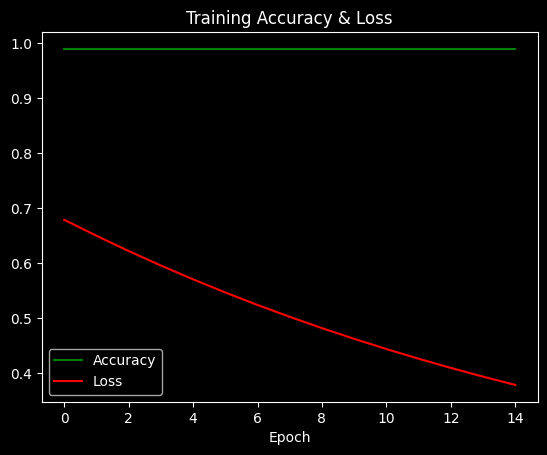

In [54]:
plt.plot(result.history['accuracy'],'green',label='Accuracy')
plt.plot(result.history['loss'],'red',label='Loss')
plt.title('Training Accuracy & Loss')
plt.xlabel('Epoch')
plt.legend(loc=0)

In [55]:
train_evaluate=model.evaluate(X_train, y_train)
test_evaluate=model.evaluate(X_test, y_test)
print('accuracy for Train set is',train_evaluate)
print('accuracy for Test set is',test_evaluate) # evaluation of model.
yf_pred1=model.predict(X_test,batch_size=512,verbose=1)
yf_pred=np.argmax(yf_pred1,axis=1)
print(f1_score(y_test,yf_pred,average="weighted"))


978/978 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9889 - loss: 0.3713
419/419 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9891 - loss: 0.3712
accuracy for Train set is [0.3711569309234619, 0.9890643954277039]
accuracy for Test set is [0.37161433696746826, 0.9885109066963196]
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step
0.9827995289705314


In [56]:
clf_pred = clf.predict(X_valid)


In [57]:
classificationSummary(y_valid, clf.predict(X_valid), class_names=classes)


Confusion Matrix (Accuracy 0.9871)

       Prediction
Actual    0    1
     0 4892   18
     1   46    8


In [58]:
accuracy_score(y_valid,clf_pred)


0.9871071716357775

In [59]:
predictions = model.predict(X_valid)


156/156 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step


In [60]:
predictions = (predictions > 0.5).astype(np.float32)


In [61]:
predictions


array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]], dtype=float32)

In [62]:
accuracy_score(y_valid,predictions)

0.9891216760676873

In [63]:
 keras.backend.clear_session()